In [2]:
#Import librarires
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

import math

In [3]:
# Utility Functions
def sigmoid(z):
    return 1/(1 + math.e ** -z)

In [7]:
def print_confusion_matrix(true_labels, predictions):
    #plot confusion matrix
    mat = confusion_matrix(true_labels, predictions)
    plot_confusion_matrix(conf_mat=mat)

    #Calculate precision, recall, f1_score

    #precision
    precision = precision_score(true_labels, predictions)

    #recall
    recall = recall_score(true_labels, predictions)

    #fl score
    f1 = f1_score(true_labels, predictions)

    #Print precision, recall, f1_score
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return

In [211]:
def calculate_accuracy(labels, predictions):
    accuracy = accuracy_score(labels, predictions) * 100
    print(f"Accuracy: {accuracy:.2f}%")

In [55]:
def get_predictions(feature_data):
    #run feature data through the trained model to get the linera activations from the output layer
    logits = model(feature_data)

    #convert the model outputs to probabilities by running through the sigmoid function
    logits = sigmoid(logits)

    # get predictions by converting output probabilities to True if >= 0.5, and False if < 0.5
    predictions = logits >= 0.5

    #convert True to 1 and False to 0
    predictions = [int(boolean) for boolean in predictions]

    return predictions

In [87]:
#Import dataset from online repo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 
  
# metadata 
#print(ionosphere.metadata) 
  
# variable information 
#print(ionosphere.variables) 

"""
Datset:
 
Sigillito,V., Wing,S., Hutton,L., and Baker,K.. (1989). Ionosphere. UCI Machine Learning Repository. https://doi.org/10.24432/C5W01B.
"""


' \nSigillito,V., Wing,S., Hutton,L., and Baker,K.. (1989). Ionosphere. UCI Machine Learning Repository. https://doi.org/10.24432/C5W01B.\n'

In [88]:
#Preprocessing

#Copy the dataframe to preserve original data
y_conv = y.copy()

#Define replacement mapping
result_mapping = {
    "g": 1, #good = 1
    "b": 0  #bad = 0
}

y_conv['Class'] = y['Class'].replace(result_mapping)
y_conv.head()

,Class
0,1
1,0
2,1
3,0
4,1


In [89]:
#convert datasets into numpy arrays
features = X.to_numpy()
init_labels = y_conv.to_numpy()

#scaler object
scaler = StandardScaler()

#Scaled features
scaled_features = scaler.fit_transform(features)

In [90]:
print(f"Features shape: {scaled_features.shape}")
print(f"Labels shape: {init_labels.shape}")


Features shape: (351, 34)
Labels shape: (351, 1)


In [91]:
print(f"Features {features[0]}")

print(f"Scaled Features: {scaled_features[0]}")

Features [ 1.       0.       0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708
  1.       0.0376   0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223
  0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357
  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.3409   0.42267 -0.54487
  0.18641 -0.453  ]
Scaled Features: [ 0.34843328  0.          0.71237237 -0.23425724  0.48420769 -0.20173498
  0.57705879 -0.95467914  0.96407416 -0.29751023  0.66865465 -0.67310732
  0.3166732  -1.09854253  0.40067797 -0.99048557  0.74798503 -0.76968095
  0.35615548 -0.57471451  0.38264404 -0.58952424  0.01158471 -0.79012864
  0.29772766 -0.86756495 -0.25386754 -0.71397123 -0.28828966 -0.61703878
  0.12293694 -1.05505394 -0.3122206  -0.99959483]


In [92]:
#Split dataset into training, cv, test

X_train, X_test, y_train, y_test = train_test_split(scaled_features, init_labels, test_size=0.4, random_state=35)

#Split test 50:50 for cv and test sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)


#Print split results
print(f"Train type: {type(X_train[0][5])}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")


Train type: <class 'numpy.float64'>
X_train shape: (210, 34)
X_test shape: (70, 34)
X_cv shape: (71, 34)
y_train shape: (210, 1)
y_test shape: (70, 1)
y_cv shape: (71, 1)


In [523]:
#Model creation

model = Sequential([
    tf.keras.Input(shape=(34,)),
    Dense(15, activation='relu', kernel_regularizer=l2(0.004)),
    Dense(30, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(2, activation='relu', kernel_regularizer=l2(0.06)),
    Dense(1, activation='linear')
])

In [524]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 15)                525       
                                                                 
 dense_140 (Dense)           (None, 30)                480       
                                                                 
 dense_141 (Dense)           (None, 2)                 62        
                                                                 
 dense_142 (Dense)           (None, 1)                 3         
                                                                 
Total params: 1070 (4.18 KB)
Trainable params: 1070 (4.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [525]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy']    
)

#fit the model
history = model.fit(
    scaled_features, init_labels,
    validation_data=(X_cv, y_cv),
    epochs=60
)

Epoch 1/60
11/11 [==============================] - 1s 13ms/step - loss: 1.0746 - accuracy: 0.3561 - val_loss: 1.0339 - val_accuracy: 0.2535
Epoch 2/60
11/11 [==============================] - 0s 3ms/step - loss: 1.0387 - accuracy: 0.3618 - val_loss: 1.0046 - val_accuracy: 0.2535
Epoch 3/60
11/11 [==============================] - 0s 4ms/step - loss: 1.0039 - accuracy: 0.3761 - val_loss: 0.9709 - val_accuracy: 0.2535
Epoch 4/60
11/11 [==============================] - 0s 3ms/step - loss: 0.9689 - accuracy: 0.3818 - val_loss: 0.9358 - val_accuracy: 0.2958
Epoch 5/60
11/11 [==============================] - 0s 3ms/step - loss: 0.9330 - accuracy: 0.4046 - val_loss: 0.8966 - val_accuracy: 0.3380
Epoch 6/60
11/11 [==============================] - 0s 3ms/step - loss: 0.8946 - accuracy: 0.4387 - val_loss: 0.8589 - val_accuracy: 0.3380
Epoch 7/60
11/11 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5556 - val_loss: 0.8174 - val_accuracy: 0.4507
Epoch 8/60
11/11 [=

In [526]:
#list history data
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


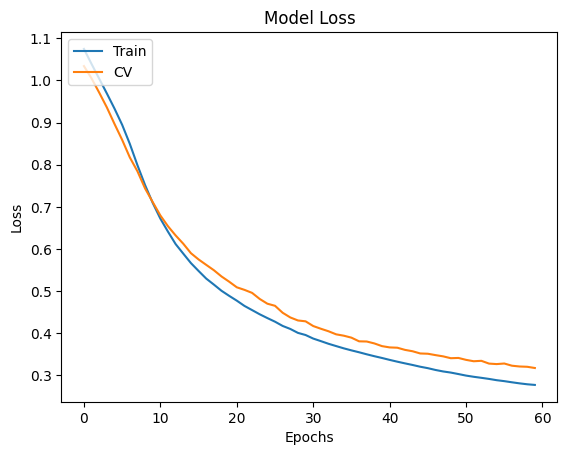

In [527]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'CV'], loc='upper left')
plt.show()

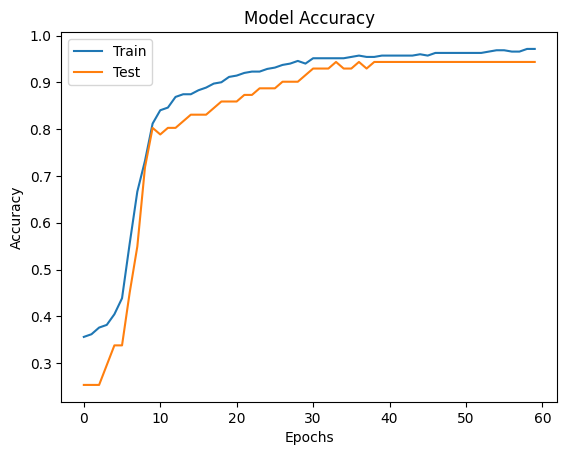

In [528]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [529]:
#Get predictions for training set
prediction_train = get_predictions(X_train)

In [530]:
calculate_accuracy(y_train, prediction_train)

Accuracy: 97.14%


Precision: 0.95
Recall: 1.00
F1 Score: 0.98


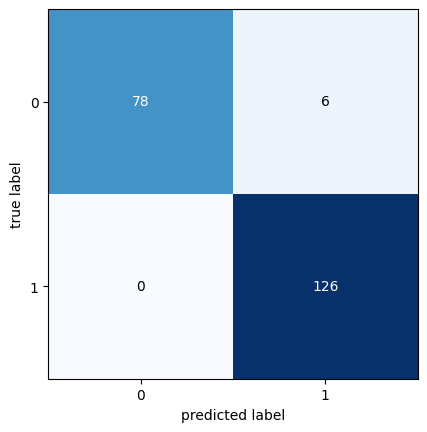

In [531]:
print_confusion_matrix(y_train, prediction_train)

In [532]:
#CV predictions
prediction_cv = get_predictions(X_cv)

In [533]:
calculate_accuracy(y_cv, prediction_cv)

Accuracy: 95.77%


Precision: 0.96
Recall: 0.98
F1 Score: 0.97


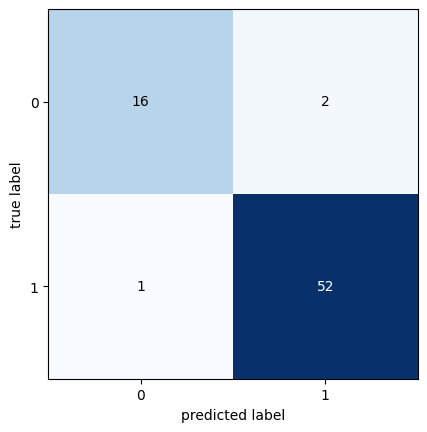

In [534]:
print_confusion_matrix(y_cv, prediction_cv)

In [535]:
#evaluate model on test set
print("Evaluate on test Data")
results = model.evaluate(X_test, y_test)
print(f"test loss, test acc: {results}")

Evaluate on test Data
3/3 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 1.0000
test loss, test acc: [0.2499183863401413, 1.0]


In [536]:
#determine the accuracy for test set
prediction_test = get_predictions(X_test)

In [537]:
calculate_accuracy(y_test, prediction_test)

Accuracy: 98.57%


Precision: 0.98
Recall: 1.00
F1 Score: 0.99


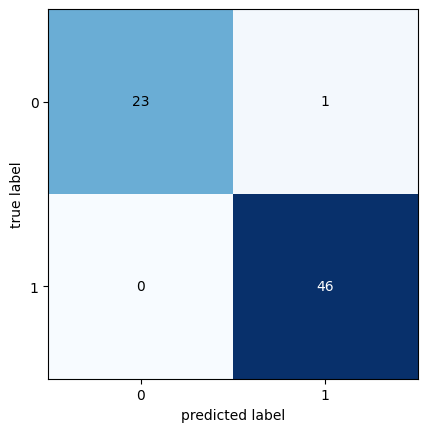

In [538]:
print_confusion_matrix(y_test, prediction_test)